In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
fname = df.quality.unique()
fname

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
fsize = df.groupby('quality',sort= False).size()
fsize

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

# Graph showing quality vs quantity using the datset

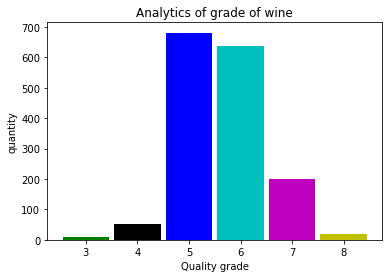

In [37]:
import matplotlib.pyplot as plt
plt.bar(fname, fsize, width=0.9, color=['b','c','m','k','y','g'])
plt.xlabel('Quality grade')
plt.ylabel('quantity')
plt.title('Analytics of grade of wine')
plt.show()

In [6]:
x=df.iloc[:,0:11].values
y=df.iloc[:,11].values


In [7]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=100)

In [42]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

# Classifying using Random Forest Classifier


In [43]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train) 
y_pred = model.predict(x_test)#x_test is the testing variable and if y_pred will be the same as y_test then it is accurate 
y_pred

y_test

model.score(x_test,y_test)*100

71.25

In [68]:
c = [[7,0.6,0.12,2.2,0.083,13,28,0.9966,3.52,0.62,10.2]]

In [69]:
y_pred1 = model1.predict(c)
y_pred1

array([7], dtype=int64)

# Classifying using Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train) 
y_pred = model.predict(x_test)#x_test is the testing variable and if y_pred will be the same as y_test then it is accurate 
y_pred

y_test

model.score(x_test,y_test)*100

c:\users\shivani\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


58.75

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
df.shape

(1599, 12)

In [48]:
model = KNeighborsClassifier(n_neighbors = 500 ,metric='euclidean')

In [49]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

y_test

model.score(x_test,y_test)*100

57.49999999999999

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model1 = DecisionTreeClassifier()

In [52]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
y_pred1 = model1.predict(x_test)
y_pred1

array([6, 6, 5, 6, 7, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 5, 5, 4, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 5, 4, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5,
       5, 5, 4, 6, 6, 7, 6, 7, 6, 6, 5, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 6, 6, 6, 5, 8, 5, 5, 5, 4, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 7, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 7, 6, 4, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5,
       7, 5, 6, 5, 5, 8], dtype=int64)

In [54]:
y_test

array([5, 6, 5, 6, 7, 7, 6, 6, 6, 7, 7, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 8, 6, 6, 5, 4, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 6, 6, 3, 6, 5, 5, 6, 5, 6, 7, 7, 5, 5, 5, 7, 5, 7, 7, 6, 4,
       5, 6, 5, 5, 5, 8, 6, 7, 6, 6, 5, 6, 6, 5, 4, 5, 7, 6, 5, 5, 6, 6,
       6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 4, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 6, 4, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 7, 6, 6, 7, 6, 5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 6, 6,
       7, 6, 6, 3, 5, 5], dtype=int64)

In [55]:
model.score(x_test,y_test)*100

57.49999999999999

array([7], dtype=int64)